<a href="https://colab.research.google.com/github/AnastasiaV703/Business_Analytics_Portfolio/blob/main/A/B_Testing_Ads_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

df = pd.read_csv('/content/marketing_AB.csv')
df
# I will analyze if person bought a product  or not ('converted' - True/False)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [21]:
# "test group" consists of "ad" - person who saw advertisement, and "psa" - person who only saw the public service announcement.

df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [15]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

# Summarizing conversions by group
conversion_summary = df.groupby('test group')['converted'].agg(['sum', 'count'])
conversion_summary['conversion_rate'] = conversion_summary['sum'] / conversion_summary['count']
print(conversion_summary)

# "ad" group has higher conversion rate compared to "psa" group

              sum   count  conversion_rate
test group                                
ad          14423  564577         0.025547
psa           420   23524         0.017854


In [17]:
# Proportions Z-test

successes = conversion_summary['sum'].values
trials = conversion_summary['count'].values
z_stat, p_value = proportions_ztest(successes, trials)
print(f"Z-stat = {z_stat:.3f}")
print(f"P-value = {p_value:.4f}")

# Z-stat of 7.37 shows the difference in conversion rates over 7 standard deviations away from "no difference". This is a very strong result.
# P-value indicates a low probability that the observed results happened by chance. We can reject the null hypothesis meaning conversion rates between 2 groups are not equal.

Z-stat = 7.370
P-value = 0.0000


<ipython-input-24-7f0cd2d25870>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test group', y='conversion_rate', data=conversion_summary, palette='viridis')


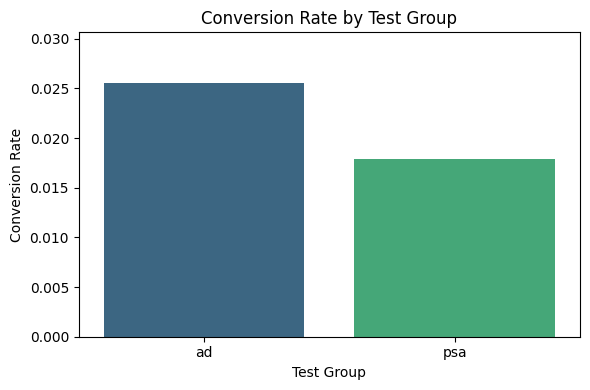

In [24]:
# Plot conversion rates

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x='test group', y='conversion_rate', data=conversion_summary, palette='viridis')
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')
plt.ylim(0, conversion_summary['conversion_rate'].max() * 1.2)
plt.tight_layout()
plt.show()

<ipython-input-50-fb23438e07e8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='most ads hour', y='total ads', data=ads_by_hour, palette='crest')


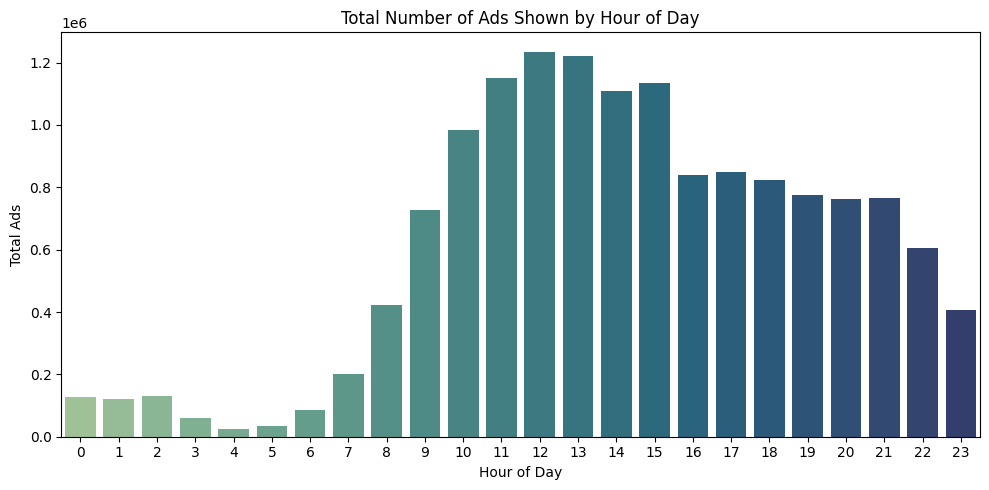

In [50]:
# Plot total number of ads by hour

plt.figure(figsize=(10, 5))
sns.barplot(x='most ads hour', y='total ads', data=ads_by_hour, palette='crest')
plt.title('Total Number of Ads Shown by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Ads')
plt.tight_layout()
plt.show()

<ipython-input-51-84cc6245e4fb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='most ads day', y='total ads', data=ads_by_day, palette='crest')


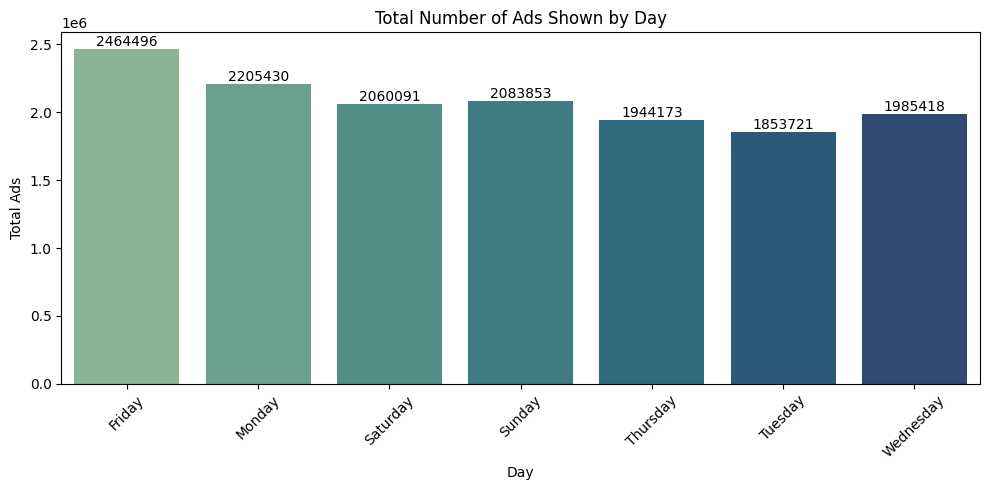

In [51]:
# Plot total number of ads by day

df['most ads day'] = df['most ads day'].astype(str)

# Group by day and sum total ads
ads_by_day = df.groupby('most ads day')['total ads'].sum().reset_index()

# Sort by day
ads_by_day = ads_by_day.sort_values('most ads day')

# Plot total number of ads by day
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='most ads day', y='total ads', data=ads_by_day, palette='crest')
plt.title('Total Number of Ads Shown by Day')
plt.xlabel('Day')
plt.ylabel('Total Ads')
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height,
        s=f'{int(height)}',
        ha='center',
        va='bottom'
    )
plt.tight_layout()
plt.show()